<a href="https://colab.research.google.com/github/Onamihoang/CIFAR10_DL01/blob/master/Copy_of_EfficientNet_PyTorch_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download image and class labels
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/img.jpg
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt

--2020-03-29 04:38:06--  https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/img.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 113.35K  --.-KB/s    in 0.01s   

2020-03-29 04:38:12 (9.49 MB/s) - ‘img.jpg’ saved [116068/116068]

--2020-03-29 04:38:13--  https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3156

In [2]:
# Get EfficientNet PyTorch
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=23d2128cbfd96bbecdabdb0d6f412e683b6a48c496629a50fd2aeabcaf6421de
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch


In [0]:
import json
from PIL import Image

import torch
from torchvision import transforms

from efficientnet_pytorch import EfficientNet

In [0]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

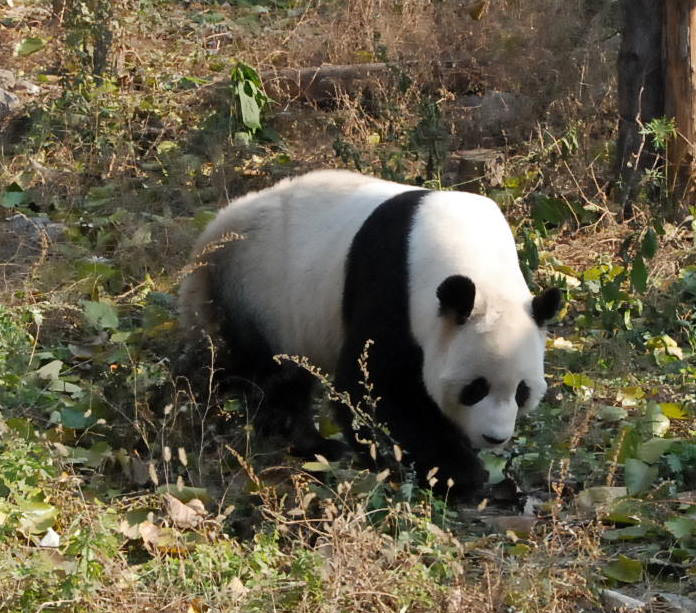

In [5]:
img = Image.open('img.jpg')
img

In [0]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [0]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [8]:
# Classify with EfficientNet
model = EfficientNet.from_pretrained(model_name)
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0
-----
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (83.44%)
brown bear, bruin, Ursus arctos                                             (0.62%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.60%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.44%)
Arctic fox, white fox, Alopex lagopus                                       (0.34%)
